In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('/home/mustafa/ML_task/regression/winequality-red.csv')
#print(df)


In [3]:
x = df.values[:, 0:len(df.columns)-1]
y = df.values[:, len(df.columns)-1]
def feature_normalize(x):
 mu = np.mean(x,axis=0)
 sigma = np.std(x,axis = 0, ddof=0, dtype=np.float64)
 x_norm = (x - mu)/sigma
 #y_norm =(y-(np.mean(y,axis=0)))/(np.std(y,ddof=0,dtype=np.float64))
 return x_norm, mu, sigma 
x_norm, mu, sigma = feature_normalize(x)

#print('mu= ', mu)
#print('sigma= ', sigma)
#print('X_norm= ', x_norm)


In [4]:
y_norm =(y-(np.mean(y,axis=0)))/(np.std(y,ddof=0,dtype=np.float64))

In [5]:
x1 = np.hstack((np.ones((len(df),1)), x_norm))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x1, y_norm, test_size = 0.3, random_state = 69)
#x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.25, random_state = 100)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# training the model on the input and output data
model.fit(x_train,y_train)
print("Coefficients: ", model.coef_[1:12])
print("Intercept: ", model.intercept_)

Coefficients:  [ 0.02389946 -0.23045142 -0.05132507  0.02814793 -0.09771138  0.05102584
 -0.14482996 -0.03664303 -0.09614111  0.19672819  0.35013467]
Intercept:  -0.019285438443014558


In [8]:
from sklearn.metrics import r2_score

#y_pred = np.dot(x_test, theta)
#y_pred = x_test[:, 1:12].dot(model.coef_[1:12]) + model.intercept_
y_pred = model.predict(x_test)
sr2 = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(sr2, 2) *100))

The accuracy of our model is 37.0%


In [9]:
def compute_cost(x_train, y_train, theta):
 predictions = x_train.dot(theta)  
 errors = np.subtract(predictions, y_train)
 sqrerrors = np.square(errors)
 J = 1 / (2 * len(df)) * np.sum(sqrerrors)
 return J 

In [10]:
def gradient_descent(x_train, y_train, theta,alpha, iterations):
 
 cost_history = np.zeros(iterations)

 for i in range(iterations):
    predictions = x_train.dot(theta)    
    errors = np.subtract(predictions, y_train)
    
    sum_delta = (alpha / len(df)) *( x_train.transpose().dot(errors))
    theta = theta - sum_delta

    cost_history[i] = compute_cost(x_train, y_train, theta)  

 return theta, cost_history , errors , predictions

theta = np.zeros(x_train.shape[1])
iterations = 100;
alpha = 0.1;

theta,cost_history,errors , predictions= gradient_descent(x_train, y_train,theta,alpha,iterations)
print("coefficients:" ,theta[1:12])
print("intercept:" ,theta[0])



coefficients: [ 0.05803568 -0.21839887 -0.02942705  0.04243332 -0.10012633  0.04625797
 -0.14268    -0.08132561 -0.06682219  0.20263882  0.31991433]
intercept: -0.019553873609935293


Text(0.5, 1.0, 'Error vs. Training Epoch')

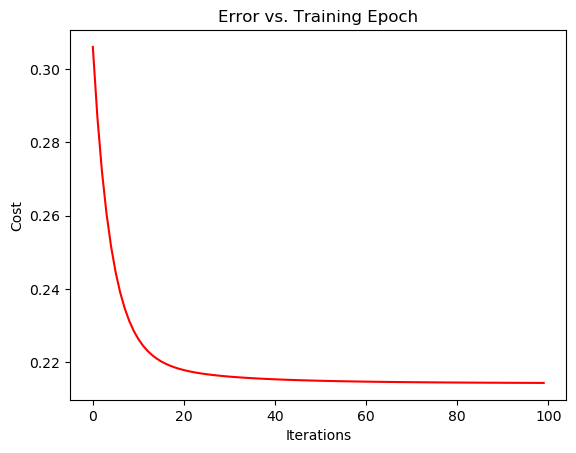

In [11]:
fig , ax = plt.subplots()  
ax.plot(np.arange(iterations), cost_history, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')




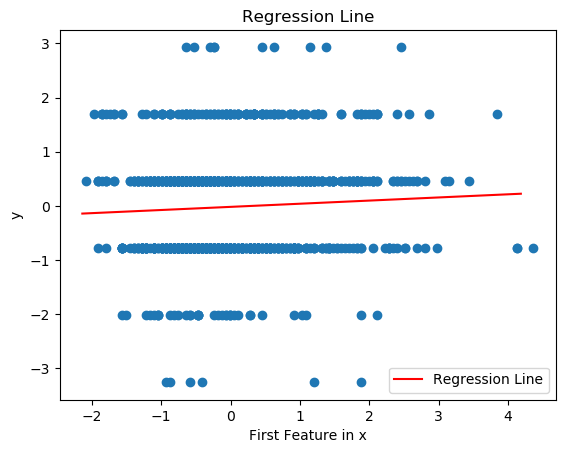

In [12]:


x_values = np.linspace(np.min(x_test[:,1]), np.max(x_test[:,1]), 100)
y_values = theta[0] + theta[1]*x_values
plt.scatter(x_train[:,1],y_train)
plt.plot(x_values, y_values, color='r', label='Regression Line')
plt.xlabel('First Feature in x')
plt.ylabel('y')
plt.title('Regression Line')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import r2_score

#y_pred = np.dot(x_test, theta)
y_pred = x_test.dot(theta)
sr2 = r2_score(y_test, y_pred)

print("The accuracy of our model is {}%".format(round(sr2, 2) *100))
#print(1-(1-r2_score(y_test, y_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1)))


The accuracy of our model is 37.0%


In [14]:
def r2score(y_pred, y ):
    y_pred = x_test.dot(theta)
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, y_test)

0.36947418555858735